# Seattle Weather Analysis

Kaggle / dataset: [Did it rain in Seattle? (1948-2017)](https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017#seattleWeather_1948-2017.csv)

This data was collected at the [Seattle-Tacoma International Airport](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND%3aUSW00024233/detail). The dataset contains five columns:

* DATE = the date of the observation
* PRCP = the amount of precipitation, in inches
* TMAX = the maximum temperature for that day, in degrees Fahrenheit
* TMIN = the minimum temperature for that day, in degrees Fahrenheit
* RAIN = TRUE if rain was observed on that day, FALSE if it was not

#### Acknowledgements:
This dataset was compiled by NOAA and is in the public domain.

In [4]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [34]:
rain <- read.csv("./seattleWeather_1948-2017.csv")
head(rain)

DATE,PRCP,TMAX,TMIN,RAIN
1948-01-01,0.47,51,42,TRUE
1948-01-02,0.59,45,36,TRUE
1948-01-03,0.42,45,35,TRUE
1948-01-04,0.31,45,34,TRUE
1948-01-05,0.17,45,32,TRUE
1948-01-06,0.44,48,39,TRUE


In [35]:
str(rain)

'data.frame':	25551 obs. of  5 variables:
 $ DATE: Factor w/ 25551 levels "1948-01-01","1948-01-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ PRCP: num  0.47 0.59 0.42 0.31 0.17 0.44 0.41 0.04 0.12 0.74 ...
 $ TMAX: int  51 45 45 45 45 48 50 48 50 43 ...
 $ TMIN: int  42 36 35 34 32 39 40 35 31 34 ...
 $ RAIN: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...


summarize only numerical values

In [36]:
summary(dplyr::select_if(rain, is.numeric))

      PRCP             TMAX             TMIN      
 Min.   :0.0000   Min.   :  4.00   Min.   : 0.00  
 1st Qu.:0.0000   1st Qu.: 50.00   1st Qu.:38.00  
 Median :0.0000   Median : 58.00   Median :45.00  
 Mean   :0.1062   Mean   : 59.54   Mean   :44.51  
 3rd Qu.:0.1000   3rd Qu.: 69.00   3rd Qu.:52.00  
 Max.   :5.0200   Max.   :103.00   Max.   :71.00  
 NA's   :3                                        

### Data Cleaning

In [37]:
table(is.na(rain))


 FALSE   TRUE 
127749      6 

it appears that we have 6 of rows that have missing values/ 

In [38]:
colSums(is.na(rain))

DATE PRCP TMAX TMIN RAIN 
   0    3    0    0    3

### Data Formatting

In [41]:
# convert the format of the DATE column from factors to Date
rain$DATE <- as.Date(rain$DATE)
summary(rain)

      DATE                 PRCP             TMAX             TMIN      
 Min.   :1948-01-01   Min.   :0.0000   Min.   :  4.00   Min.   : 0.00  
 1st Qu.:1965-06-27   1st Qu.:0.0000   1st Qu.: 50.00   1st Qu.:38.00  
 Median :1982-12-23   Median :0.0000   Median : 58.00   Median :45.00  
 Mean   :1982-12-23   Mean   :0.1062   Mean   : 59.54   Mean   :44.51  
 3rd Qu.:2000-06-18   3rd Qu.:0.1000   3rd Qu.: 69.00   3rd Qu.:52.00  
 Max.   :2017-12-14   Max.   :5.0200   Max.   :103.00   Max.   :71.00  
                      NA's   :3                                        
    RAIN        
 Mode :logical  
 FALSE:14648    
 TRUE :10900    
 NA's :3        
                
                
                

In [43]:
# create variables of the week and month of each observation
rain$month <- as.Date(cut(rain$DATE, breaks = "month"))
rain$week <- as.Date(cut(rain$DATE, breaks = "week", 
                        start.on.monday=FALSE)) # changes weekly break point on Sunday
head(rain)

DATE,PRCP,TMAX,TMIN,RAIN,month,week
1948-01-01,0.47,51,42,TRUE,1948-01-01,1947-12-28
1948-01-02,0.59,45,36,TRUE,1948-01-01,1947-12-28
1948-01-03,0.42,45,35,TRUE,1948-01-01,1947-12-28
1948-01-04,0.31,45,34,TRUE,1948-01-01,1948-01-04
1948-01-05,0.17,45,32,TRUE,1948-01-01,1948-01-04
1948-01-06,0.44,48,39,TRUE,1948-01-01,1948-01-04


Warning message:
“Removed 3 rows containing non-finite values (stat_summary).”

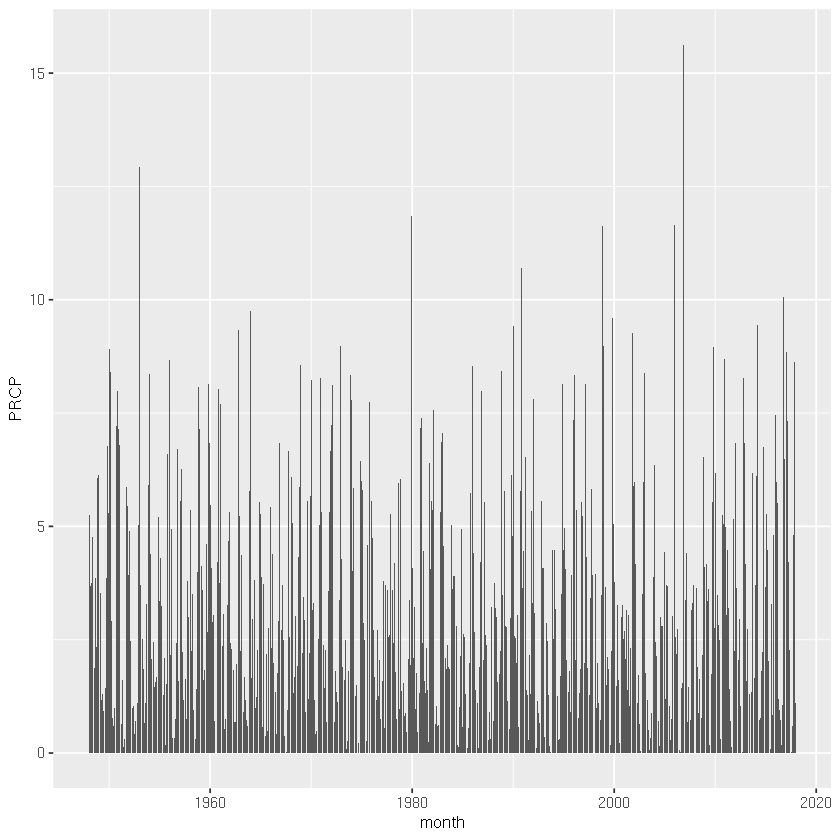

In [45]:
# graph by month
ggplot(data = rain,
       aes(month, PRCP)) +
    stat_summary(fun.y = sum, # adds up all observations for each month
                geom = "bar") 


## Exploratory Analysis

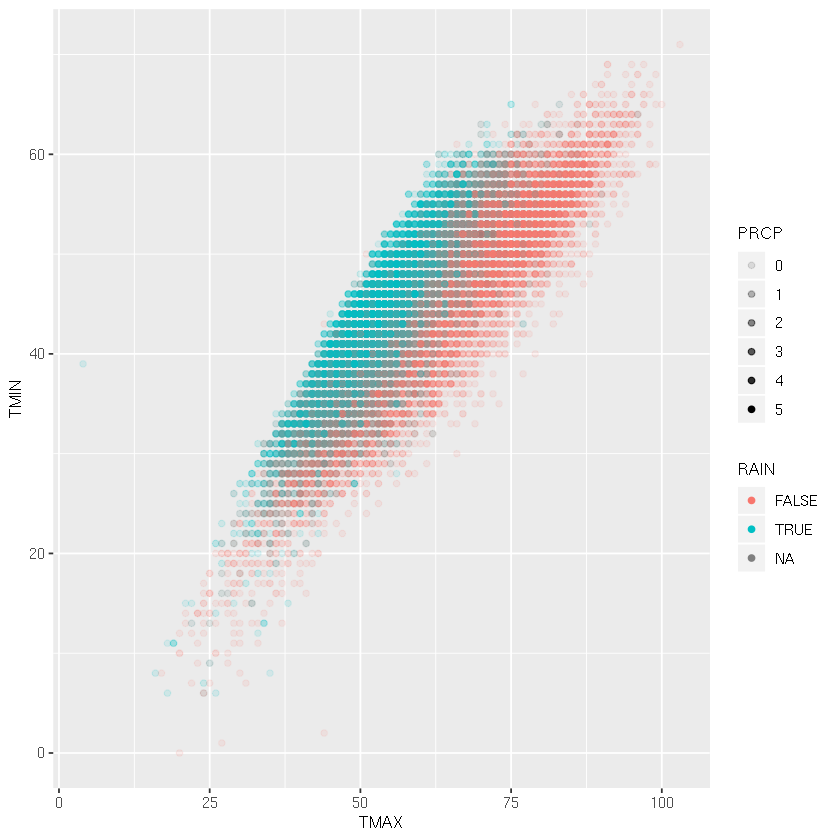

In [6]:
ggplot(data = dat) + 
    geom_point(mapping = aes(x = TMAX, y = TMIN, color = RAIN, alpha = PRCP))

From the above scatter plot we can see the relationship between the max temp and min tem

Warning message:
“Removed 3 rows containing missing values (geom_point).”

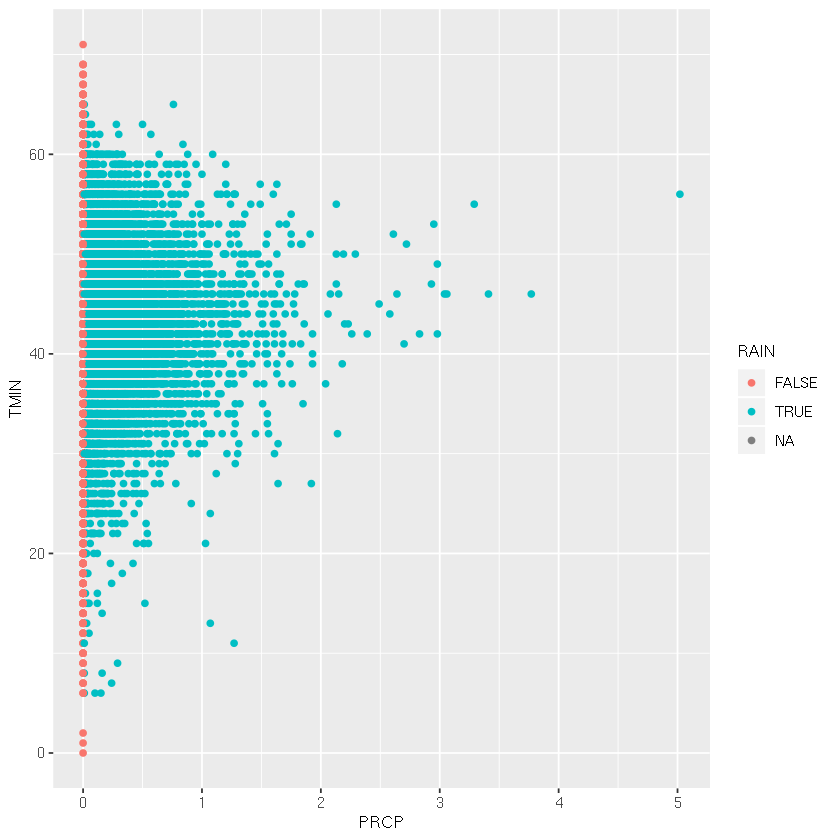

In [10]:
ggplot(data = dat) + 
    geom_point(mapping = aes(x = PRCP, y = TMIN, color = RAIN))

In [11]:
dat$DATE[2]

[1] 1948-01-02
25551 Levels: 1948-01-01 1948-01-02 1948-01-03 1948-01-04 ... 2017-12-14